In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
import seaborn as sns
import pickle

read data

In [43]:
data = pd.read_csv('../../Data/cleaned_v1.csv')

In [50]:
data.iloc[1]

Unnamed: 0                                                                1
Content                   Người tiêu dùng trẻ ngày càng có xu hướng chi ...
Label                                                              business
Content_cleaned           tiêu_dùng trẻ xu_hướng chi_tiêu thông_minh tận...
content_cleaned_v1        người tiêu_dùng trẻ ngày_càng có xu_hướng chi_...
Length_content_cleaned                                                  311
Name: 1, dtype: object

split data

In [59]:
len(set(data.iloc[4].content_cleaned_v1.split()))

98

In [58]:
len(set(data.iloc[3].Content.split()))

376

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(data["Content"], data["Label"], test_size= 0.7, random_state= 42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7324,), (7324,), (17090,), (17090,))

extract feature

In [91]:
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer(filters='1234567890!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(['tôi đi học!', 'làm@# lập  trì1nh_viên?', 'con_chim'])

In [92]:
tokenizer.word_index

{'tôi': 1,
 'đi': 2,
 'học': 3,
 'làm': 4,
 'lập': 5,
 'trì': 6,
 'nh_viên': 7,
 'con_chim': 8}

In [80]:
len(tokenizer.word_index)

7

In [49]:
tokenizer.word_index

{'và': 1,
 'của': 2,
 'các': 3,
 'có': 4,
 'trong': 5,
 'là': 6,
 'với': 7,
 'cho': 8,
 'được': 9,
 'học': 10,
 'không': 11,
 'công': 12,
 'người': 13,
 'năm': 14,
 'một': 15,
 'đã': 16,
 'để': 17,
 'đồng': 18,
 'khi': 19,
 'trường': 20,
 'nam': 21,
 'ở': 22,
 'về': 23,
 'những': 24,
 'tại': 25,
 'thể': 26,
 'đến': 27,
 'sinh': 28,
 'từ': 29,
 'đó': 30,
 'nhiều': 31,
 'theo': 32,
 'hiện': 33,
 'việt': 34,
 'đầu': 35,
 'này': 36,
 'vào': 37,
 'việc': 38,
 'số': 39,
 'định': 40,
 'cũng': 41,
 'động': 42,
 'bộ': 43,
 'thành': 44,
 'ra': 45,
 'chính': 46,
 'cơ': 47,
 'nhân': 48,
 'nhà': 49,
 'ngày': 50,
 'giá': 51,
 'quan': 52,
 'viên': 53,
 'quốc': 54,
 'trên': 55,
 'như': 56,
 'bệnh': 57,
 'sự': 58,
 'sẽ': 59,
 'hội': 60,
 'sau': 61,
 'gia': 62,
 'thời': 63,
 'chỉ': 64,
 'hơn': 65,
 'làm': 66,
 'hợp': 67,
 'nước': 68,
 'điều': 69,
 'tế': 70,
 'thực': 71,
 'tăng': 72,
 'phát': 73,
 'trung': 74,
 '1': 75,
 'hàng': 76,
 '2': 77,
 'thông': 78,
 'bị': 79,
 '\xa0': 80,
 'anh': 81,
 'phải': 82,

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer()
vector_train = tf_idf_vec.fit_transform(test)
vector_train

<2x7 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

turning parameters

In [37]:
vector_train.todense()[0].shape

(1, 7)

In [5]:
# param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly']}
# # Set up score
# scoring = ['accuracy']
# # Set up the k-fold cross-validation
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# # Define grid search
# grid_search = GridSearchCV(estimator=svm.SVC(), 
#                            param_grid=param_grid, 
#                            scoring=scoring, 
#                            refit='accuracy', 
#                            n_jobs=-1, 
#                            cv=kfold, 
#                            verbose=0)
# # Fit grid search
# grid_result = grid_search.fit(vector_train, Y_train)
# # Print grid search summary
# grid_result.best_params_

modeling

In [6]:
# scores = [grid_search.cv_results_['split0_test_accuracy'], grid_search.cv_results_['split1_test_accuracy'], 
#          grid_search.cv_results_['split2_test_accuracy'], grid_search.cv_results_['split3_test_accuracy'], 
#          grid_search.cv_results_['split4_test_accuracy'], grid_search.cv_results_['split5_test_accuracy'], 
#          grid_search.cv_results_['split6_test_accuracy'], grid_search.cv_results_['split7_test_accuracy'], 
#          grid_search.cv_results_['split8_test_accuracy'], grid_search.cv_results_['split9_test_accuracy'], ]

# # plot the accuracy scores for each fold using a box plot
# max_scores = [max(x) for x in scores]
# plt.plot(max_scores)
# plt.xlabel('Validation Set')
# plt.ylabel('Accuracy')
# plt.title('Accuracy of each Validation Set in GridSearchCV')
# plt.show()

In [7]:
classifier = svm.SVC(C=10, gamma=1, kernel="rbf")
classifier.fit(vector_train, Y_train)
vector_test = tf_idf_vec.transform(X_test)


In [22]:
y_pred = classifier.predict(vector_train)

In [23]:
# heatconmat(y_pred, Y_test)
print(classification_report(y_pred, Y_train, digits=4))

               precision    recall  f1-score   support

     business     0.9990    1.0000    0.9995      3082
    education     1.0000    0.9991    0.9995      3221
entertainment     1.0000    1.0000    1.0000      2723
       health     0.9996    0.9996    0.9996      2524
     politics     0.9996    0.9992    0.9994      2605
        sport     0.9997    1.0000    0.9998      2934

     accuracy                         0.9996     17089
    macro avg     0.9997    0.9997    0.9997     17089
 weighted avg     0.9996    0.9996    0.9996     17089



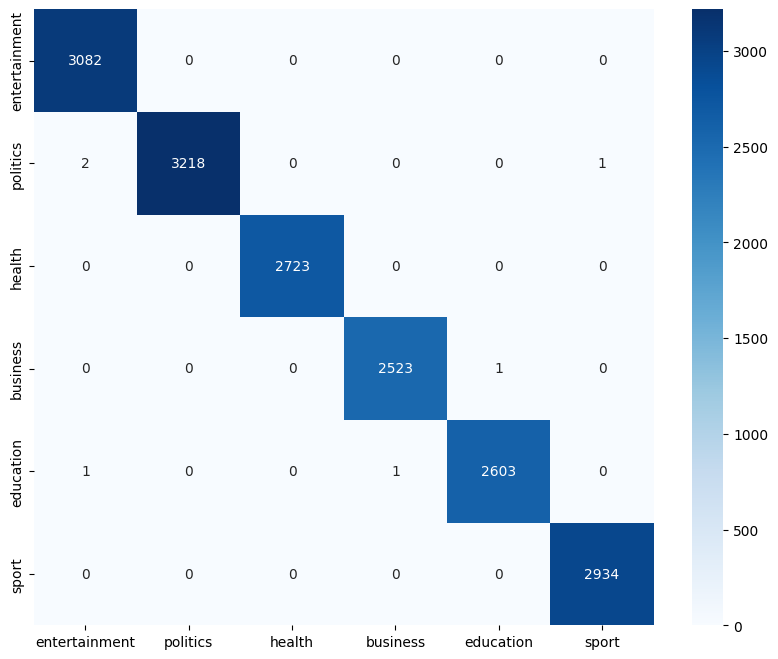

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def heatconmat(y_pred, y_test):
  plt.figure(figsize=(10,8))
  cnf_matrix = confusion_matrix(y_pred, y_test)
  ax = sns.heatmap(cnf_matrix, annot=True, fmt='', cmap='Blues')
  ax.xaxis.set_ticklabels(list(set(y_test)))
  ax.yaxis.set_ticklabels(list(set(y_test)))
  plt.show()
heatconmat(y_pred, Y_train)

In [ ]:
confusion_matrix(y_pred, Y_test)

array([[1226,   14,    4,    7,   75,    2],
       [  11, 1261,   10,   11,   29,    3],
       [   6,   17, 1117,    7,   14,    8],
       [   7,    9,    1, 1042,   16,    0],
       [  48,   17,   14,    9, 1055,    7],
       [   0,    5,    0,    1,    3, 1269]])